<a href="https://colab.research.google.com/github/saikrisnaa/calorie_burnt_prediction/blob/main/Calorie_burnt_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries for data handling, visualization, model training, and evaluation.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score

# **Loading the 'calories' and 'exercise' datasets from CSV files into Pandas DataFrames.**

In [ ]:
calor=pd.read_csv("/content/calories.csv")
exer=pd.read_csv("/content/exercise.csv")

In [ ]:
#To display the first 5 rows of 'calor' dataframe
calor.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
#To display the last 5 rows of 'exer' dataframe
exer.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5


In [ ]:
# Merging the 'exer' and 'calor' DataFrames on the 'User_ID' column to combine exercise data with calorie information.
# Only rows with matching 'User_ID' values in both DataFrames are retained (inner join).
# The resulting 'combined_data' DataFrame will include all columns from 'exer' and only the 'User_ID' and 'Calories' columns from 'calor'.
combined_data = pd.merge(exer, calor[['User_ID', 'Calories']], on='User_ID', how='inner')



In [ ]:
#To display the first 5 rows of 'combined_data' dataframe
combined_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# Displaying a concise summary of the 'combined_data' DataFrame.
# This includes the number of non-null entries, data types of each column, and memory usage,
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


In [ ]:
# Checking each column in 'combined_data' for any missing (NaN) values.
# This returns a Series indicating True for columns with NaN values and False for those without,
# which helps identify if any data cleaning is needed.
combined_data.isna().any()

,0
User_ID,False
Gender,False
Age,False
Height,False
Weight,False
Duration,False
Heart_Rate,False
Body_Temp,False
Calories,False


In [ ]:
# Generating descriptive statistics for the numerical columns in 'combined_data'.
# This includes metrics like count, mean, standard deviation, min, and max values,
combined_data.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.503533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


<Axes: xlabel='Gender', ylabel='count'>

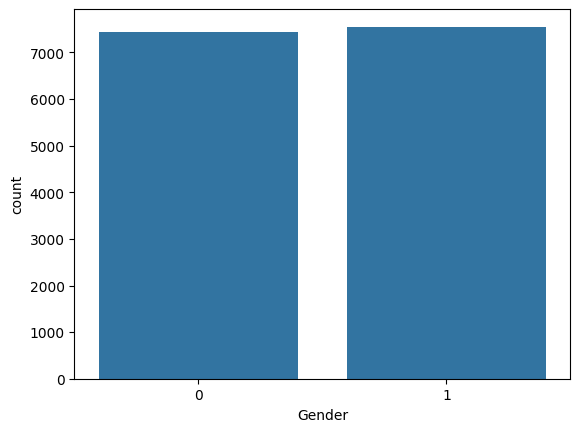

In [ ]:
# Creating a count plot to visualize the distribution of 'Gender' in 'combined_data'.
sns.countplot(x='Gender',data=combined_data)

<Axes: xlabel='Age', ylabel='Count'>

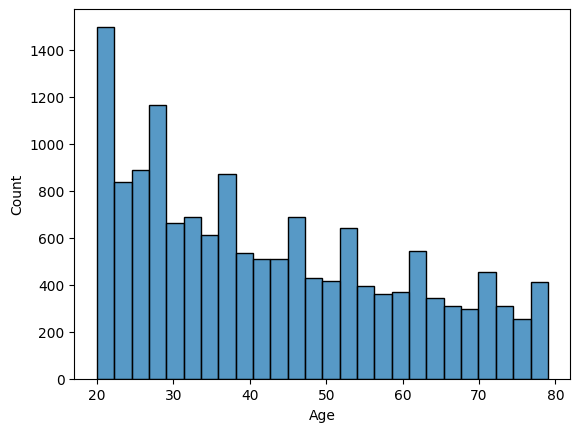

In [ ]:
# Creating a histogram to visualize the distribution of the 'Age' column in 'combined_data'.
sns.histplot(combined_data['Age'])

<Axes: xlabel='Height', ylabel='Count'>

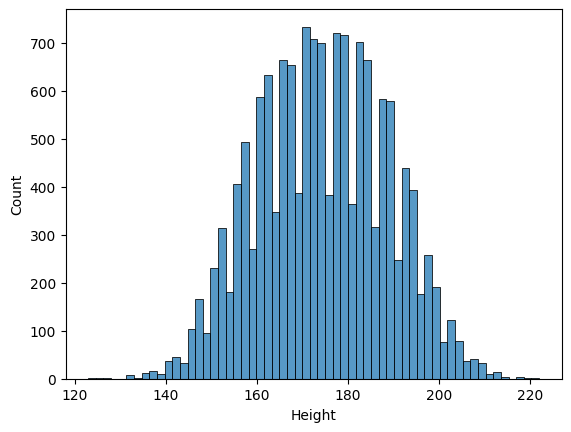

In [ ]:
 # Creating a histogram to visualize the distribution of the 'Height' column in 'combined_data'.
 sns.histplot(combined_data['Height'])

<Axes: xlabel='Weight', ylabel='Count'>

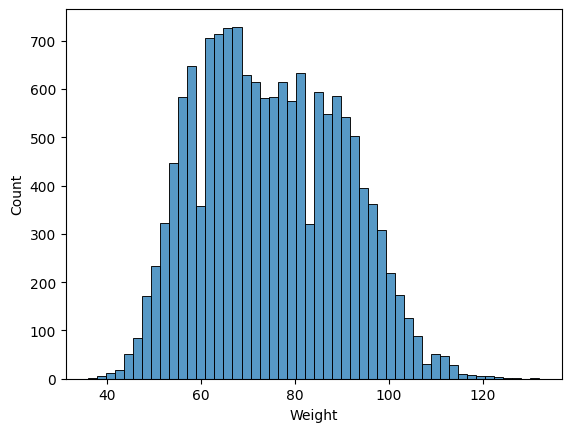

In [ ]:
# Creating a histogram to visualize the distribution of the 'Weight' column in 'combined_data'.
sns.histplot(combined_data['Weight'])

<Axes: xlabel='Heart_Rate', ylabel='Count'>

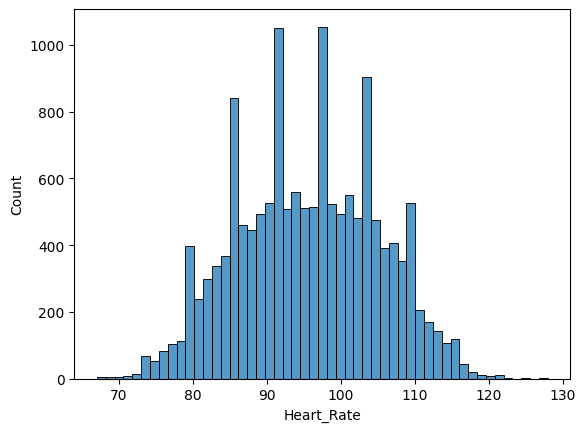

In [ ]:
# Creating a histogram to visualize the distribution of the 'Heart_Rate' column in 'combined_data'.
sns.histplot(combined_data['Heart_Rate'])

<Axes: xlabel='Body_Temp', ylabel='Count'>

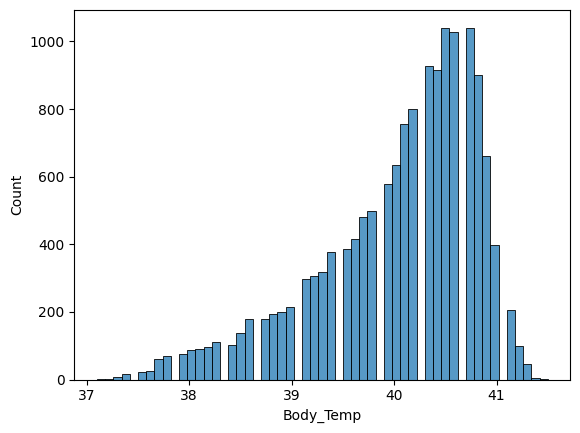

In [ ]:
# Creating a histogram to visualize the distribution of the 'Body_temp' column in 'combined_data'.
sns.histplot(combined_data['Body_Temp'])

In [ ]:
# Replacing categorical values in the 'Gender' column with numerical values.
# 'male' is replaced with 0 and 'female' with 1, converting the column to a binary format.
# This is often done to prepare the data for machine learning algorithms that require numerical input.
combined_data["Gender"] = combined_data["Gender"].replace({"male": 0, "female": 1})

<ipython-input-5-8b2581714a0e>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_data["Gender"] = combined_data["Gender"].replace({"male": 0, "female": 1})


In [ ]:
combined_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# Separating features and target variable from the 'cd' DataFrame.
# 'a' contains the feature set with unnecessary columns ('User_ID' and 'Calories') dropped.
# 'b' contains the target variable, 'Calories', which we aim to predict.
a= combined_data.drop(columns=['User_ID','Calories'], axis=1)
b= combined_data['Calories']

In [ ]:
print(a)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(b)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


# **Splitting the data into training and testing sets**

In [ ]:
# Splitting the features ('a') and target ('b') into training and testing sets.
# 80% of the data is used for training and 20% for testing (test_size=0.2).
# Setting random_state=2 ensures reproducibility of the split.

a_train, a_test, b_train, b_test = train_test_split(a,b, test_size=0.2, random_state=2)

In [ ]:
print(a.shape, a_train.shape, a_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [ ]:
combined_data.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,1,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,1,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,0,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,0,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,1,26,146.0,51.0,16.0,90.0,40.2,72.0


# **Model Training**

In [ ]:
# Applying polynomial feature transformation to the training features 'a_train' using PolynomialFeatures.
# This expands the feature set by including polynomial combinations of the features up to the specified degree (degree=2),
# enabling the model to capture non-linear relationships within the data.
# The transformed feature set is stored in 'a_poly'.

model=PolynomialFeatures(degree=2)
a_poly = model.fit_transform(a_train)

In [ ]:
# Initializing a linear regression model to fit on the polynomial-transformed features.
# Training the model using 'a_poly' (polynomial features of 'a_train') and 'b_train' (target variable).
# This fits the linear regression model to the transformed data, allowing it to learn the relationship between features and target.

polyreg = LinearRegression()
polyreg.fit(a_poly, b_train)

LinearRegression()

# **Prediction on Test Data**

In [ ]:
# Transforming the test features 'a_test' into polynomial features using the same transformation model.
# Using the trained polynomial regression model to predict 'b_pred', which contains the predicted values for 'b_test'.
# This evaluates the model's performance on the test set by comparing 'b_pred' to the actual target values.

a_test_poly = model.transform(a_test)
b_pred = polyreg.predict(a_test_poly)

In [ ]:
# Calculating the Mean Absolute Error (MAE) between the actual values ('b_test') and the predicted values ('b_pred').
# MAE provides an average of the absolute differences between predictions and actual values, indicating prediction accuracy.
# Printing the MAE to assess the model's performance, with lower values indicating better accuracy.

mae = mean_absolute_error(b_test,b_pred)
print(mae)

2.2420376833789954
